In [43]:
from empca_residuals import *
from apogee.tools import bitmask as bm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
rc12= empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4800
Found good limits
Data key: done
Done getting filter information


In [4]:
rc12.findResiduals(gen=False)

In [5]:
rc13= empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4800
Found good limits
Data key: done
Done getting filter information


In [6]:
rc13.findResiduals(gen=False)

In [7]:
Vdata12 = np.ma.var(rc12.residuals)
Vnoise12 = np.ma.mean(rc12.spectra_errs**2)
Vdata13 = np.ma.var(rc13.residuals)
Vnoise13 = np.ma.mean(rc13.spectra_errs**2)

In [8]:
print Vnoise12,Vdata12,Vnoise13,Vdata13

4.48370003936e-05 0.000118723206918 6.34203090214e-05 0.000113961155575


In [9]:
print 1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13

0.622340049957 0.443491874915


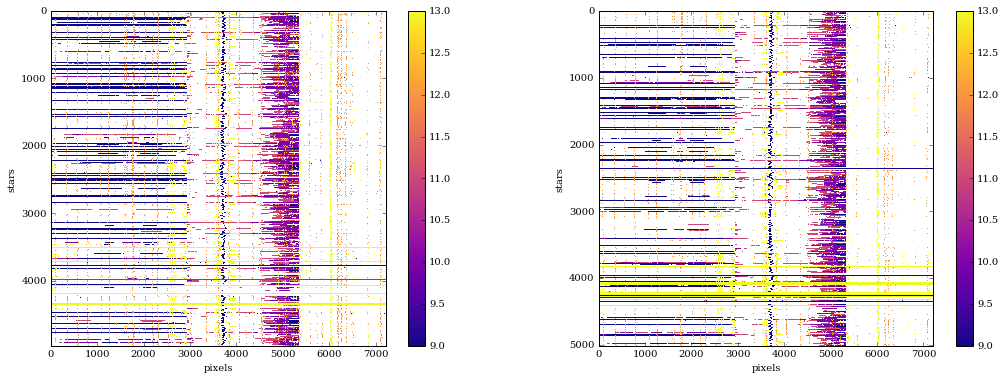

In [33]:
plt.figure(figsize=(18,6))
vmin=9
vmax=13
plt.subplot2grid((1,2),(0,0))
rc12.imshow(np.log2(rc12._bitmasks),vmin=vmin,vmax=vmax,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(np.log2(rc13._bitmasks),vmin=vmin,vmax=vmax,cmap='plasma')

In [48]:
badcombpixmask = bm.badpixmask()
badcombpixmask += 2**bitmask.apogee_pixmask_int("SIG_SKYLINE")
maskbits = bm.bits_set(badcombpixmask)
rc12bm = np.log2(rc12._bitmasks)
rc13bm = np.log2(rc13._bitmasks)

In [46]:
maskbits

[0, 1, 2, 3, 4, 5, 6, 7, 12]

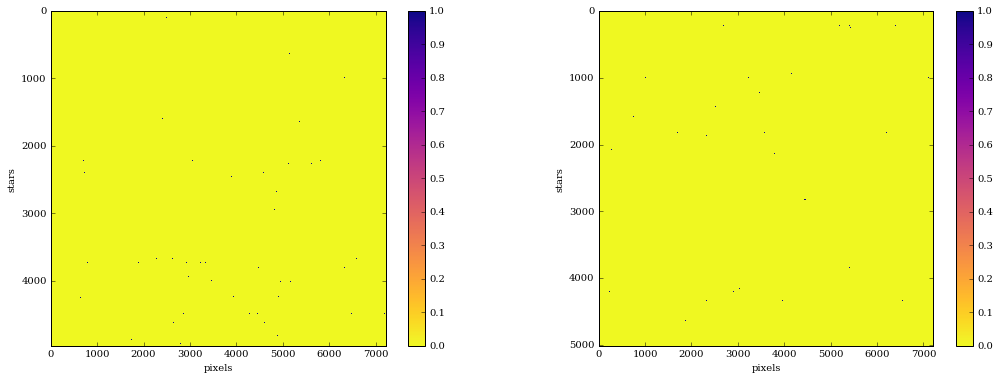

In [52]:
bit = 0
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bm==bit,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bm==bit,cmap='plasma_r')

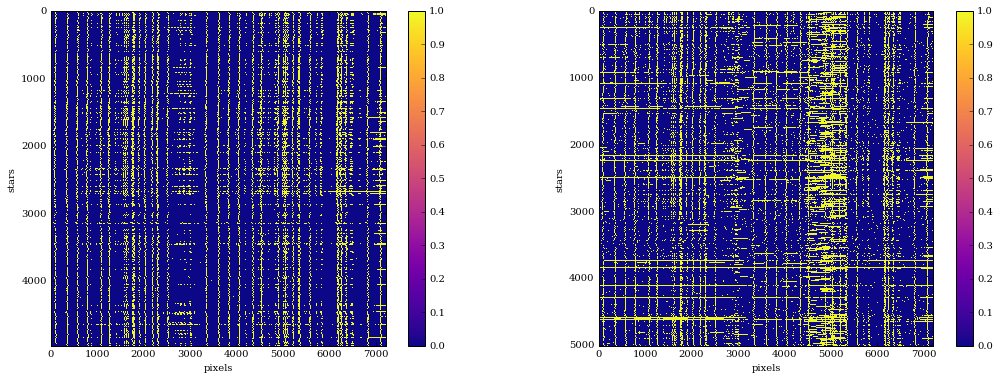

In [11]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12._maskHere,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13._maskHere,cmap='plasma')

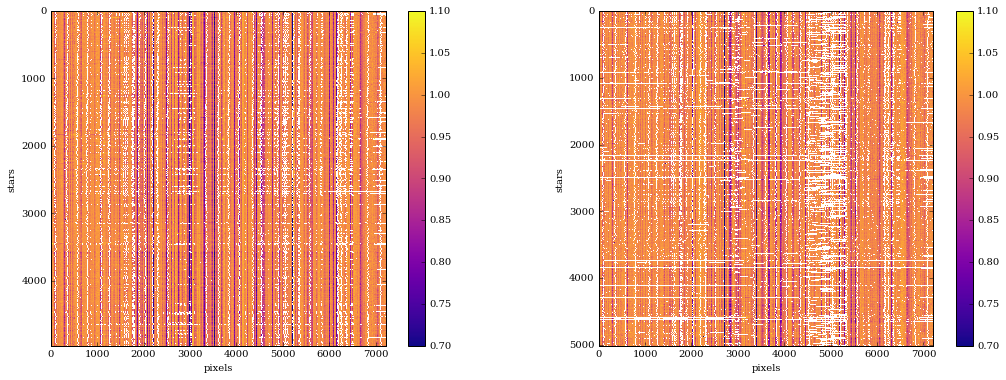

In [12]:
minlim = 0.7
maxlim = 1.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra,vmin=minlim,vmax=maxlim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra,vmin=minlim,vmax=maxlim,cmap='plasma')

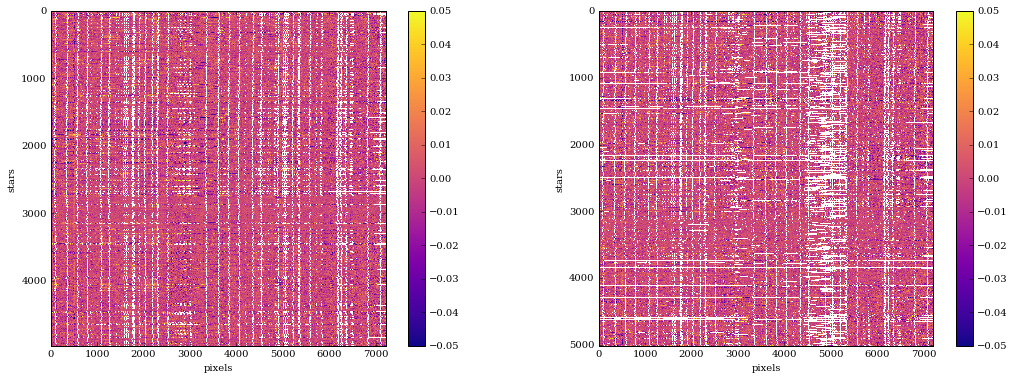

In [13]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals,vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals,vmin=-lim,vmax=lim,cmap='plasma')

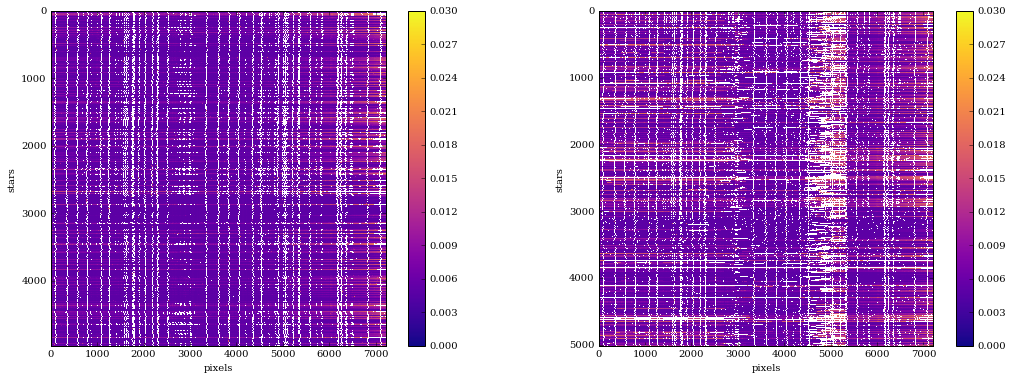

In [14]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs,vmin=0,vmax=lim,cmap='plasma')

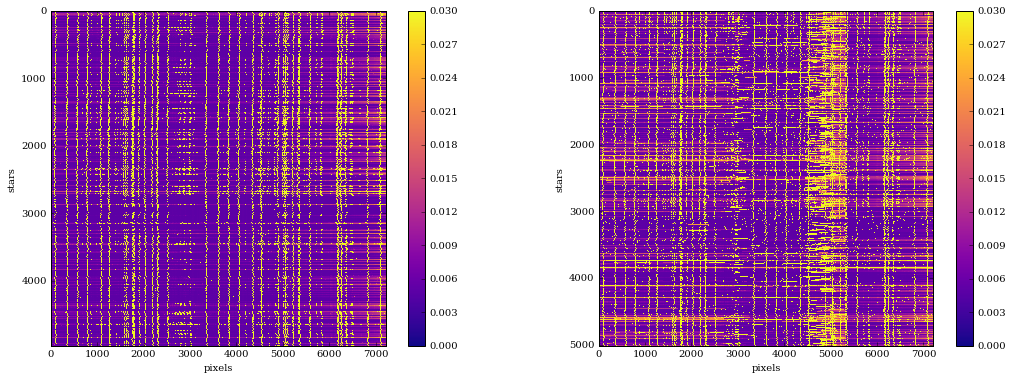

In [40]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

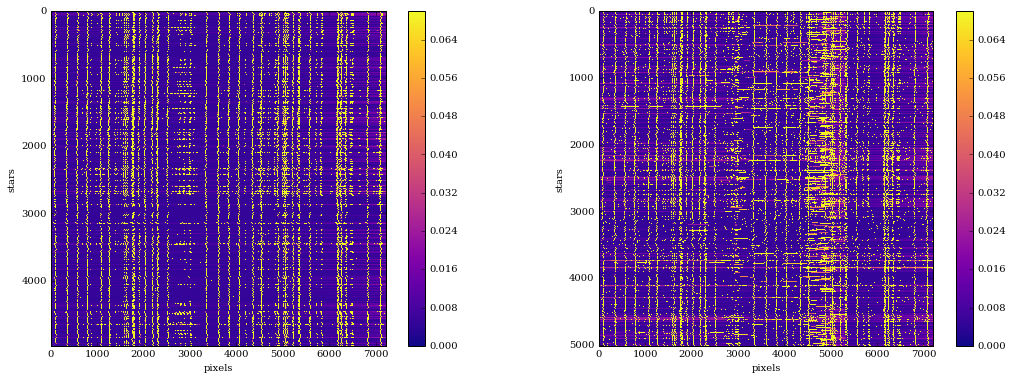

In [42]:
lim = 0.07
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

In [15]:
crossover13 = (np.array([i for i in range(len(rc13.matchingData['APOGEE_ID'])) if rc13.matchingData['APOGEE_ID'][i] in rc12.matchingData['APOGEE_ID']]),)
crossover12 = (np.array([i for i in range(len(rc12.matchingData['APOGEE_ID'])) if rc12.matchingData['APOGEE_ID'][i] in rc13.matchingData['APOGEE_ID']]),)

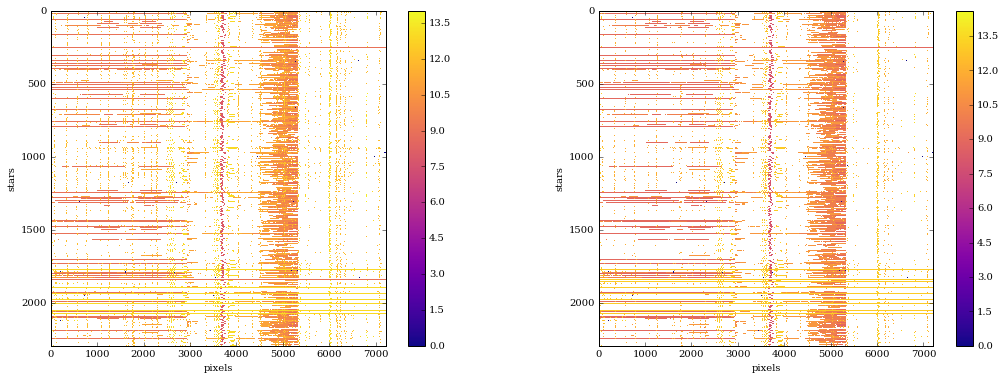

In [16]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(np.log2(rc12._bitmasks[crossover12]),cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(np.log2(rc13._bitmasks[crossover13]),cmap='plasma')

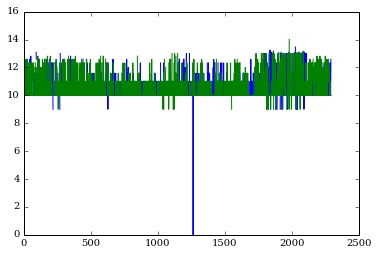

In [31]:
plt.plot(np.log2(rc13._bitmasks[crossover12].T[5000]))
plt.plot(np.log2(rc12._bitmasks[crossover12].T[5000]))

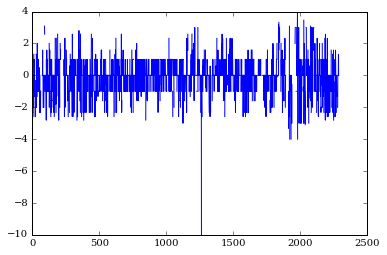

In [32]:
plt.plot(np.log2(rc13._bitmasks[crossover12].T[5000])-np.log2(rc12._bitmasks[crossover12].T[5000]))

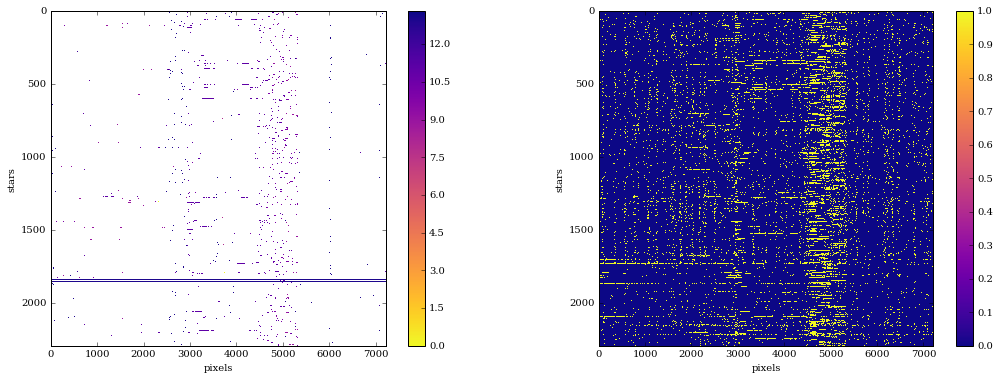

In [16]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
bmdiff=rc13._bitmasks[crossover13]-rc12._bitmasks[crossover12]
rc12.imshow(np.log2(bmdiff),cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc12.imshow(rc13._maskHere[crossover13]-rc12._maskHere[crossover12],cmap='plasma')

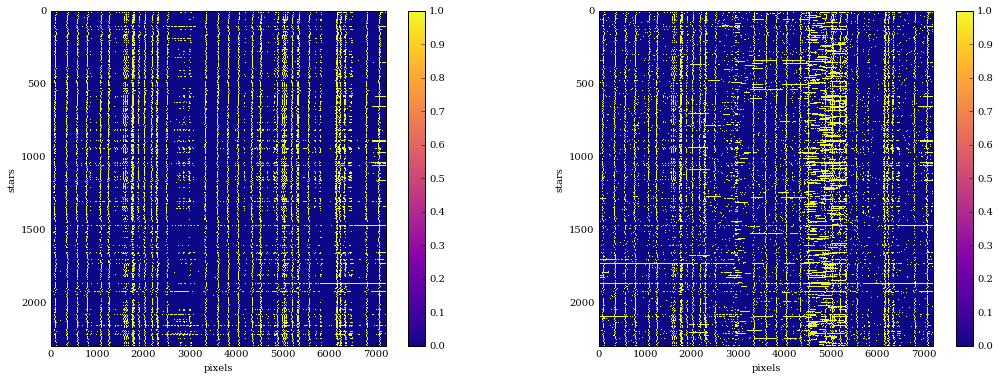

In [17]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12._maskHere[crossover12],cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13._maskHere[crossover13],cmap='plasma')

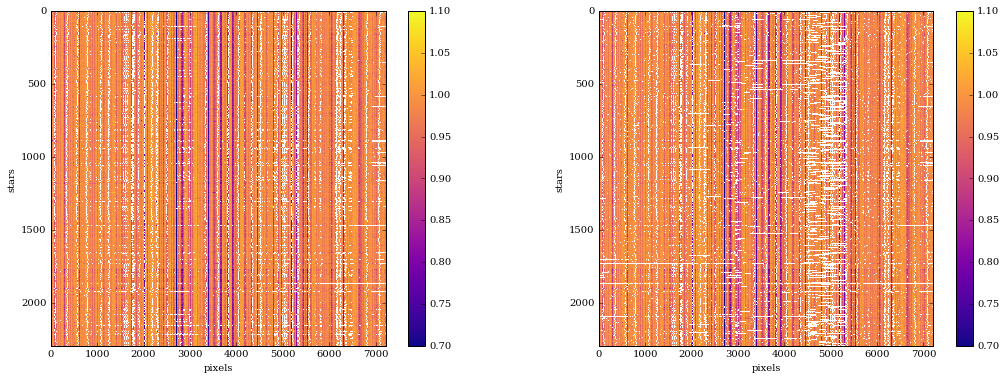

In [18]:
minlim = 0.7
maxlim = 1.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra[crossover12],vmin=minlim,vmax=maxlim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra[crossover13],vmin=minlim,vmax=maxlim,cmap='plasma')

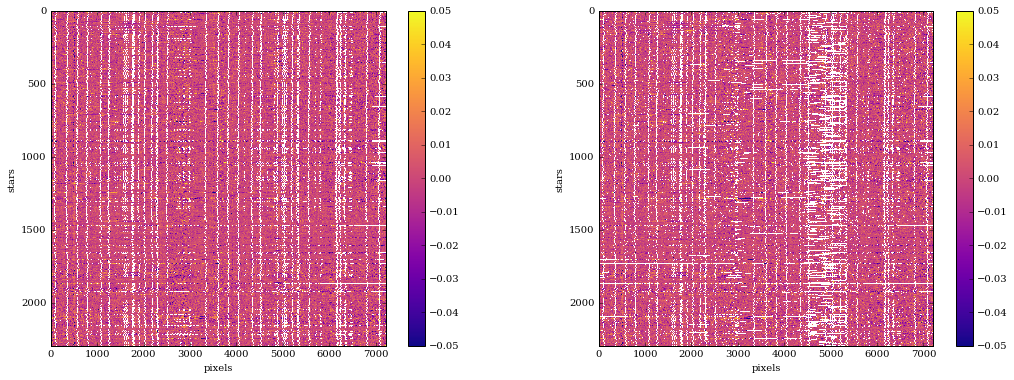

In [19]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals[crossover12],vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals[crossover13],vmin=-lim,vmax=lim,cmap='plasma')

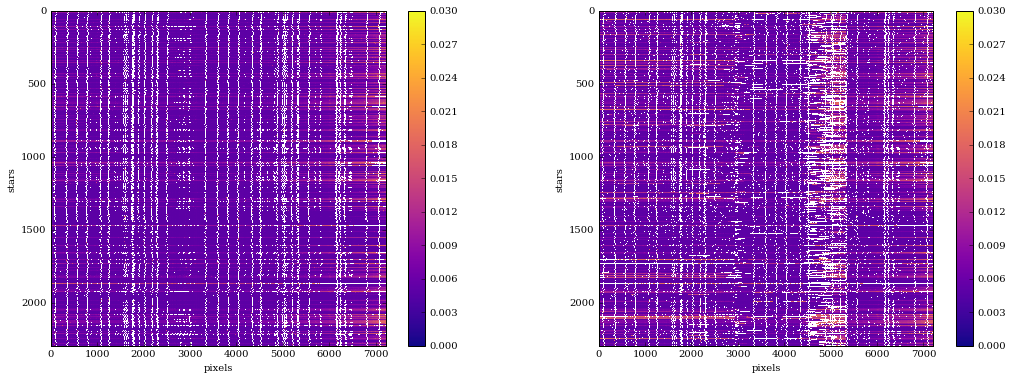

In [20]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs[crossover12],vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs[crossover13],vmin=0,vmax=lim,cmap='plasma')

In [21]:
Vdata12cross = np.ma.var(rc12.residuals[crossover12])
Vnoise12cross = np.ma.mean(rc12.spectra_errs[crossover12]**2)
Vdata13cross = np.ma.var(rc13.residuals[crossover13])
Vnoise13cross = np.ma.mean(rc13.spectra_errs[crossover13]**2)

In [22]:
print Vnoise12cross,Vdata12cross,Vnoise13cross,Vdata13cross

4.11239787727e-05 0.000100385862517 5.23079496747e-05 9.7018552715e-05


In [23]:
print 1-Vnoise12cross/Vdata12cross, 1-Vnoise13cross/Vdata13cross

0.590340933058 0.460845908221


In [55]:
badcombpixmask = bm.badpixmask()
badcombpixmask += 2**bitmask.apogee_pixmask_int("SIG_SKYLINE")
maskbits = bm.bits_set(badcombpixmask)
rc12bm = np.log2(rc12._bitmasks[crossover12])
rc13bm = np.log2(rc13._bitmasks[crossover13])

In [56]:
maskbits

[0, 1, 2, 3, 4, 5, 6, 7, 12]

492


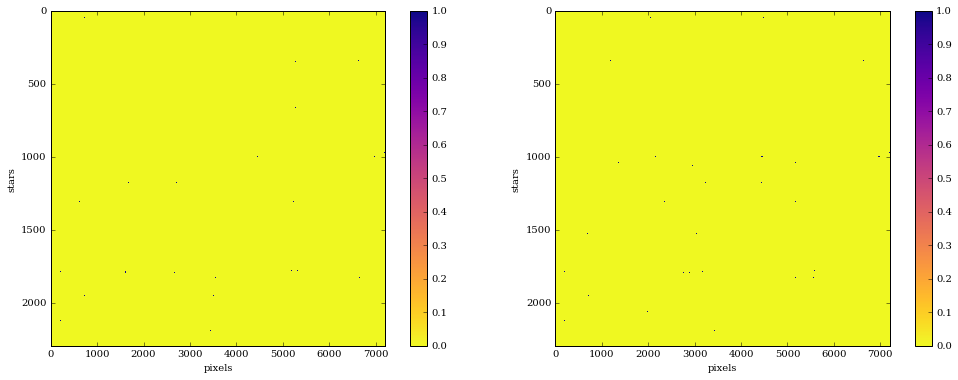

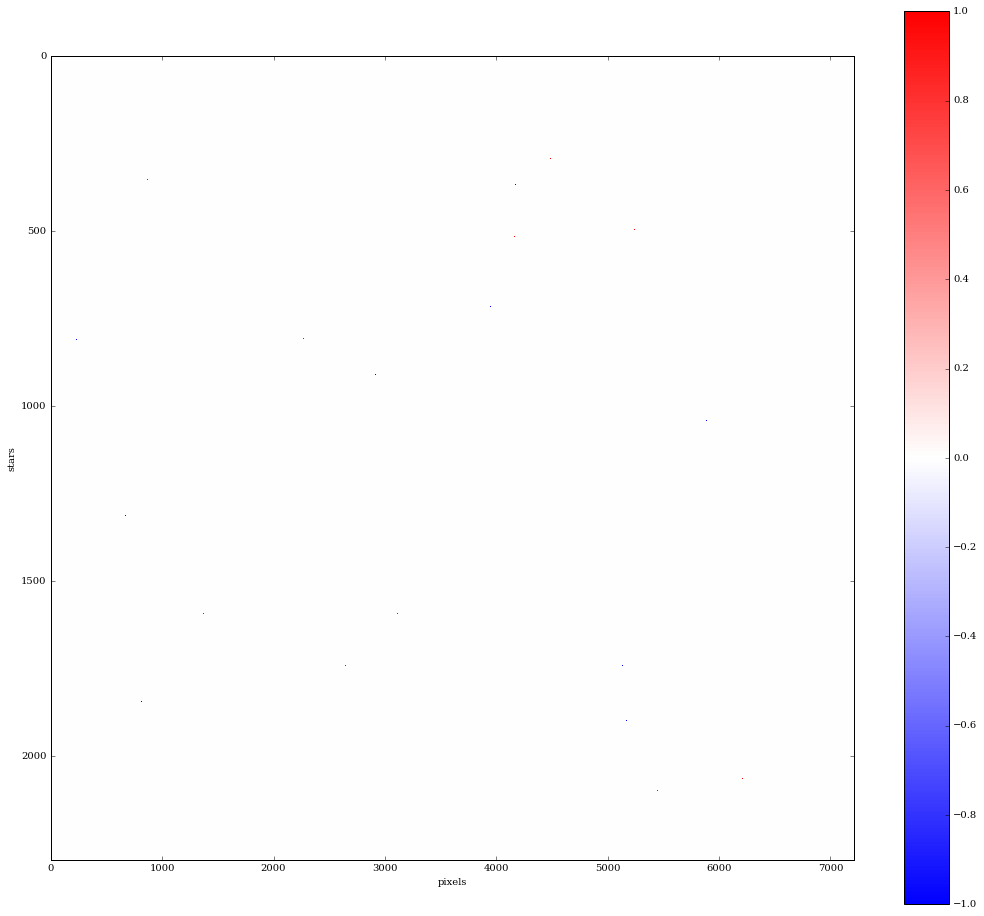

In [107]:
bit = 0
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


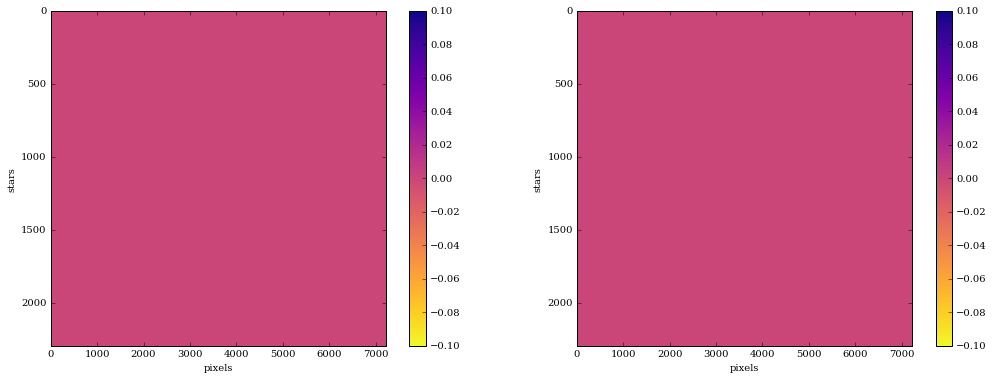

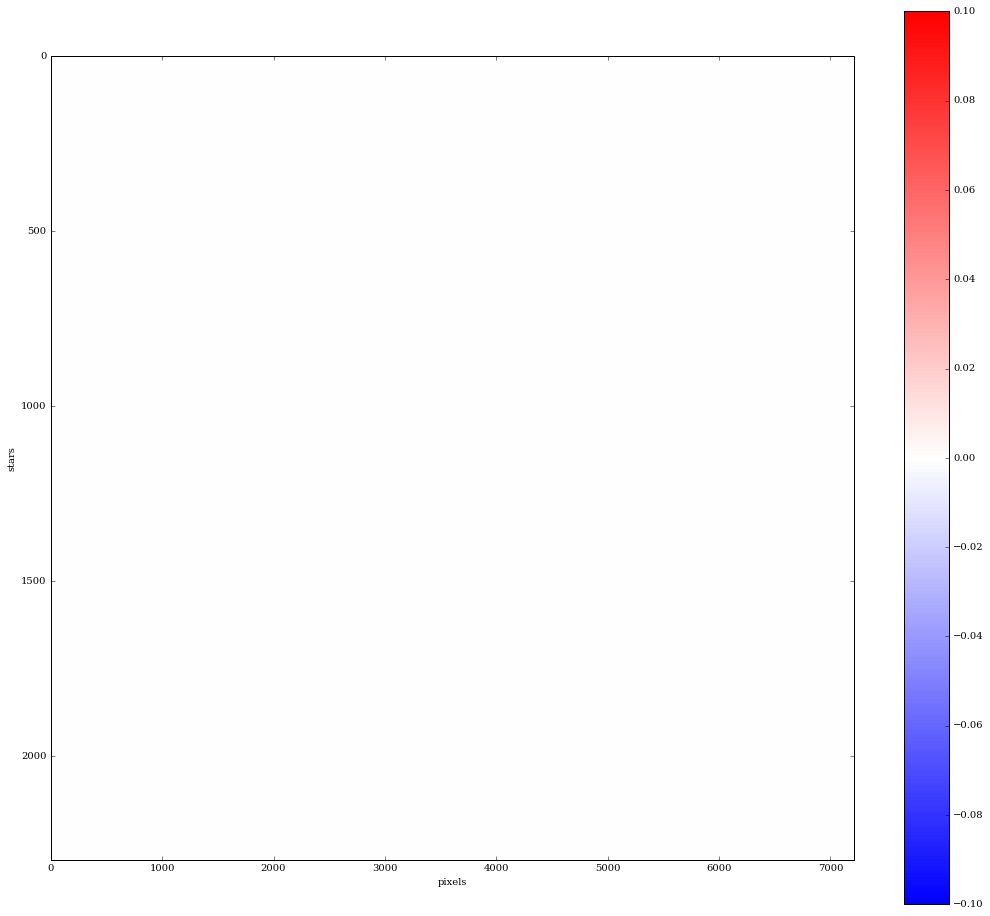

In [106]:
bit = 1
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


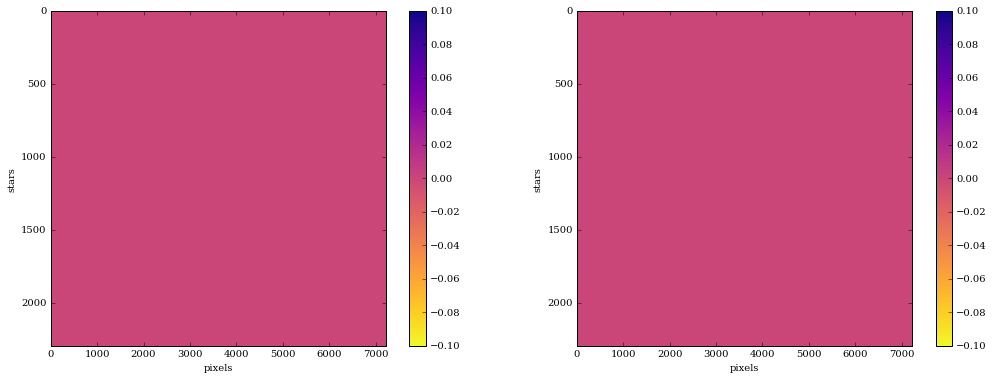

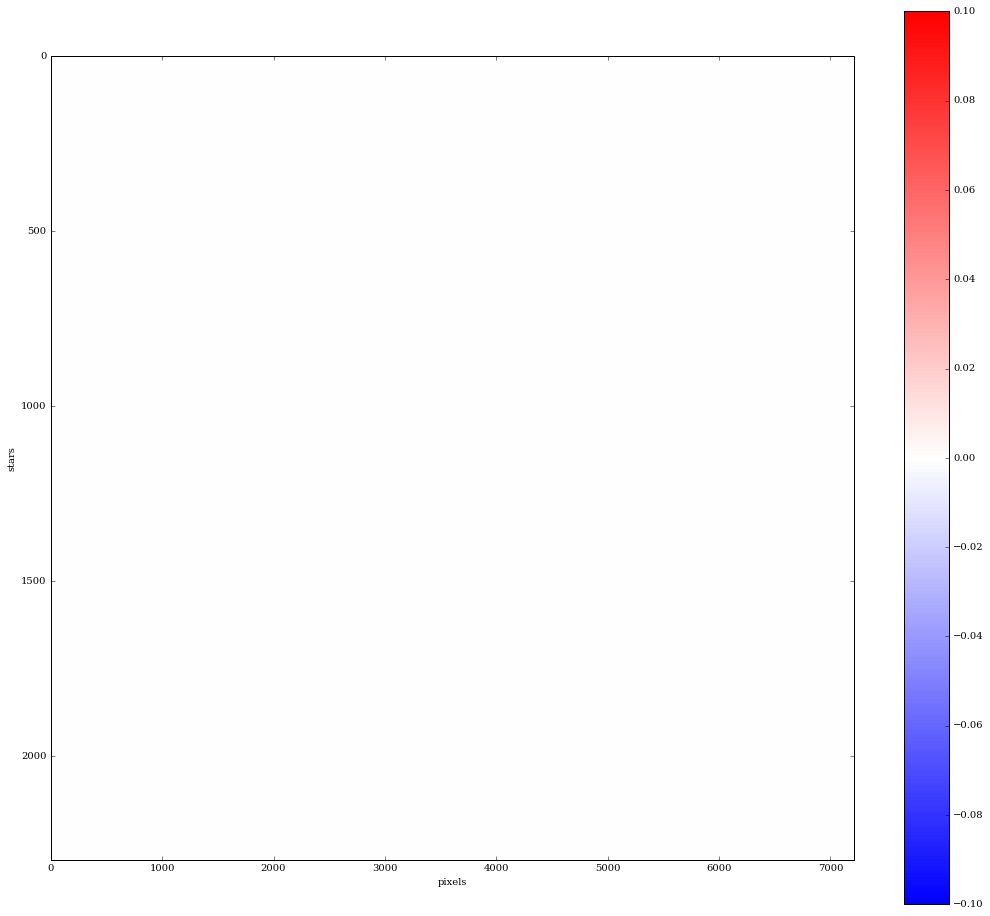

In [108]:
bit = 2
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


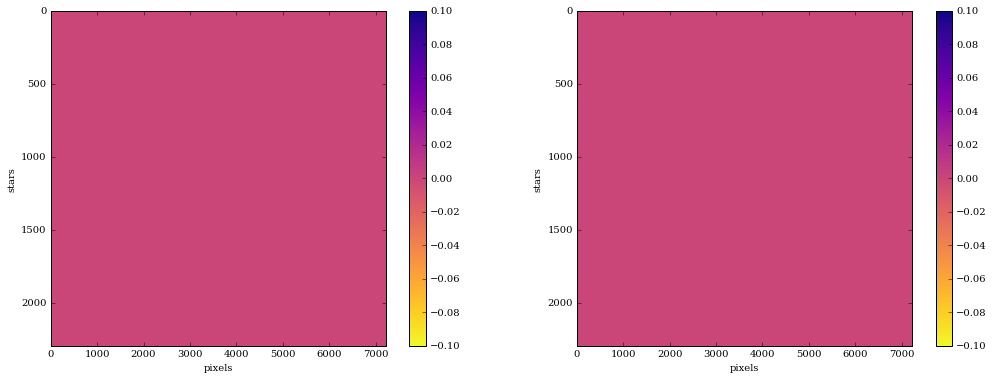

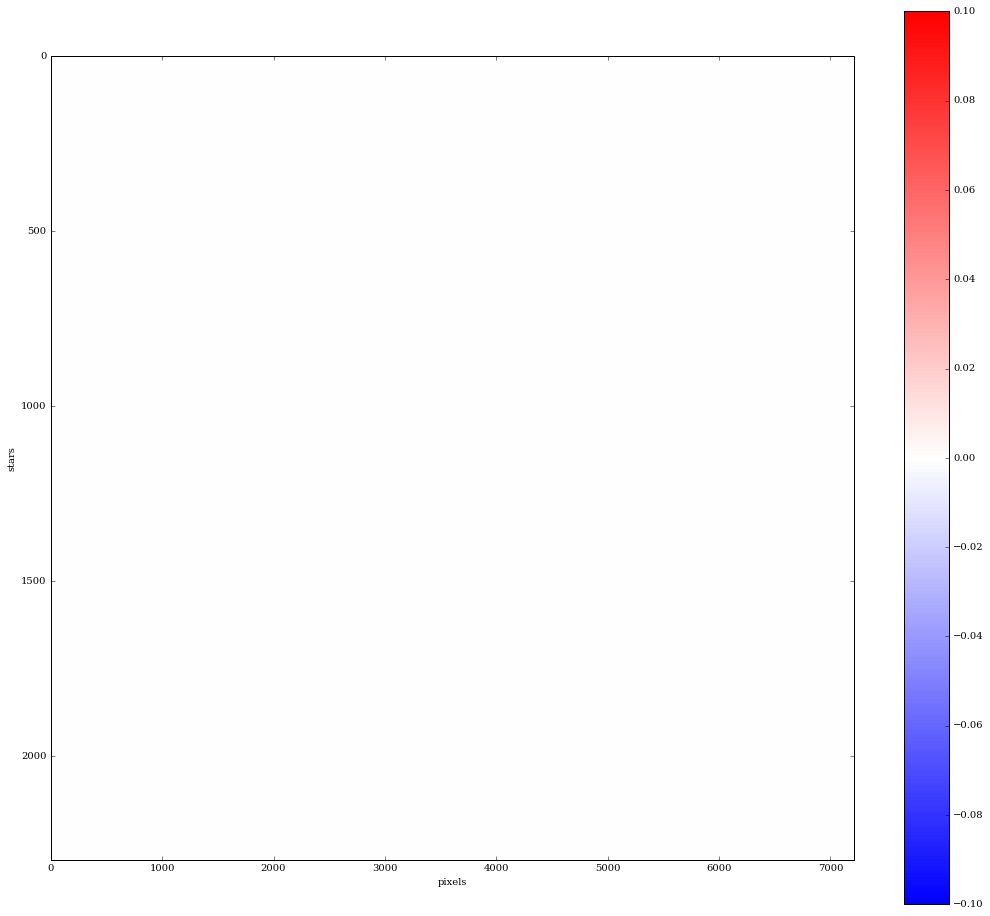

In [109]:
bit = 3
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


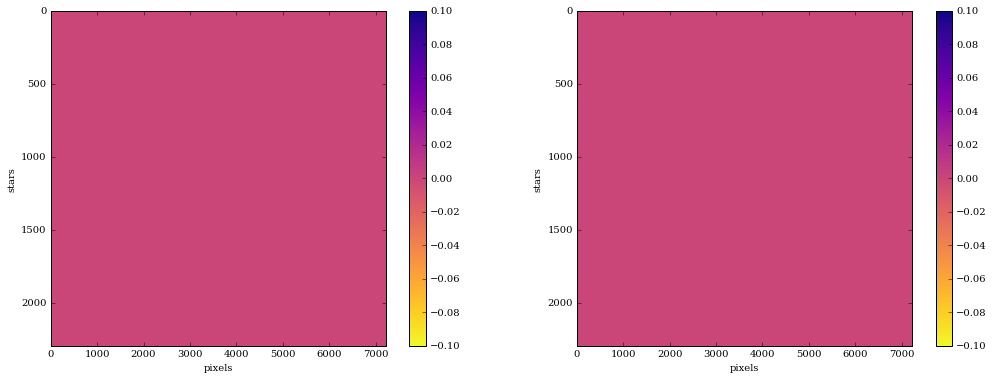

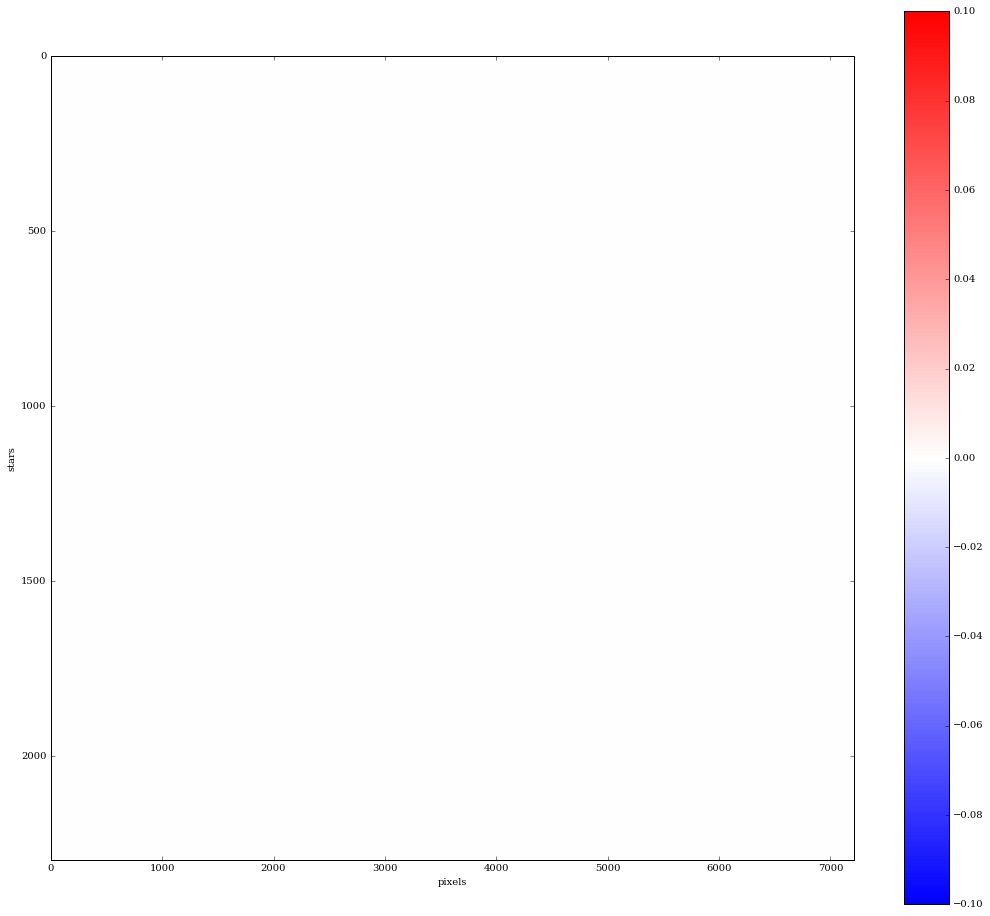

In [110]:
bit = 4
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


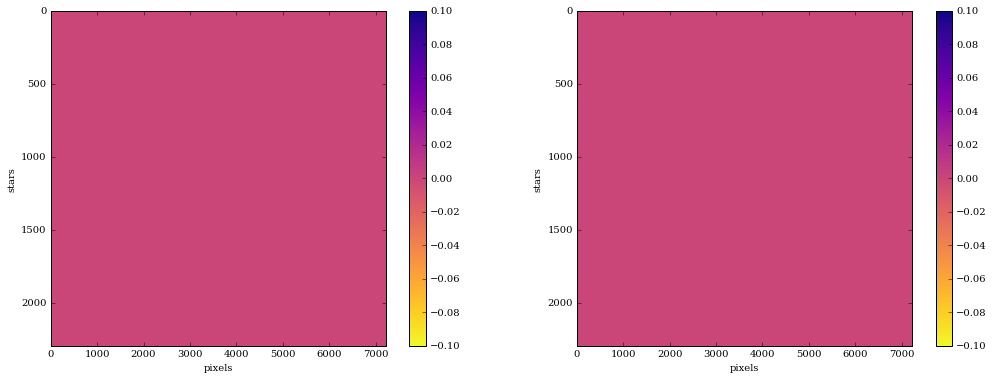

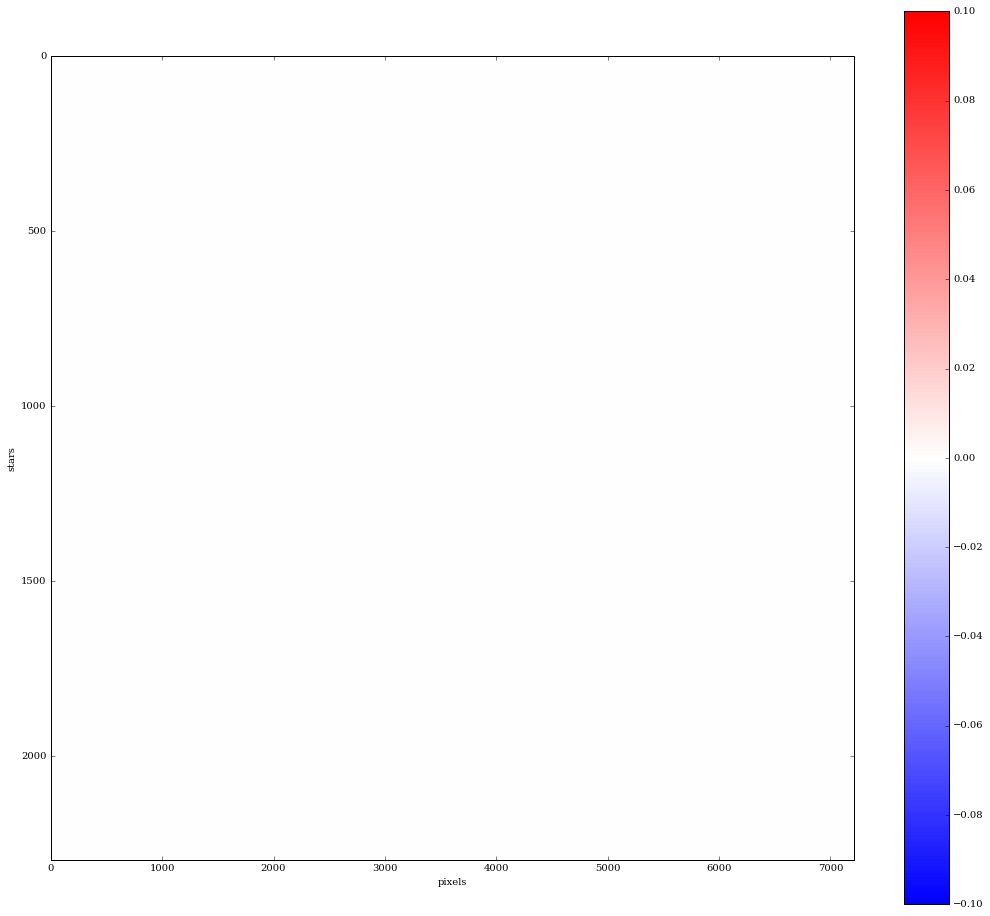

In [111]:
bit = 5
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


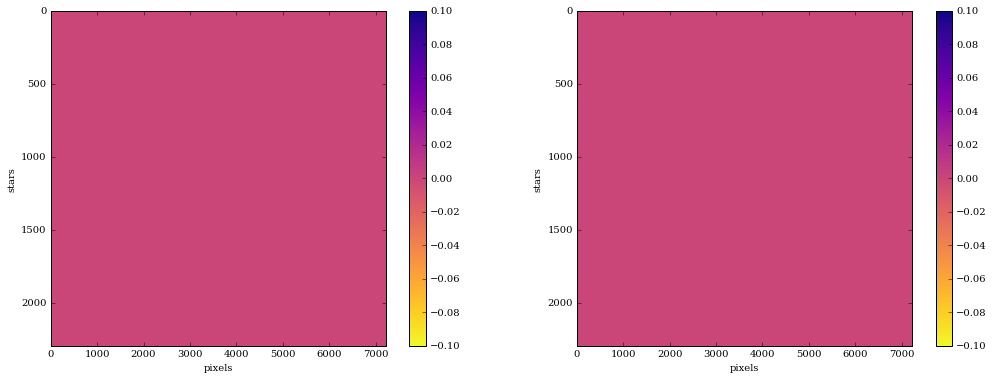

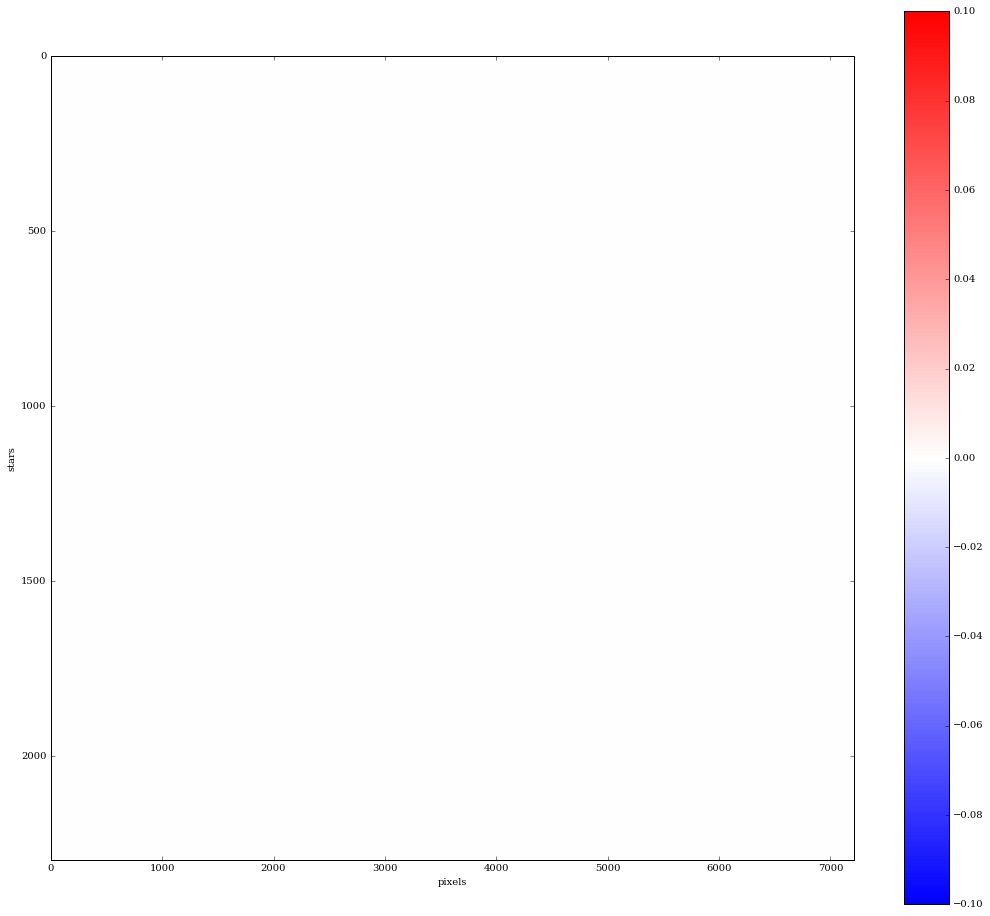

In [112]:
bit = 6
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


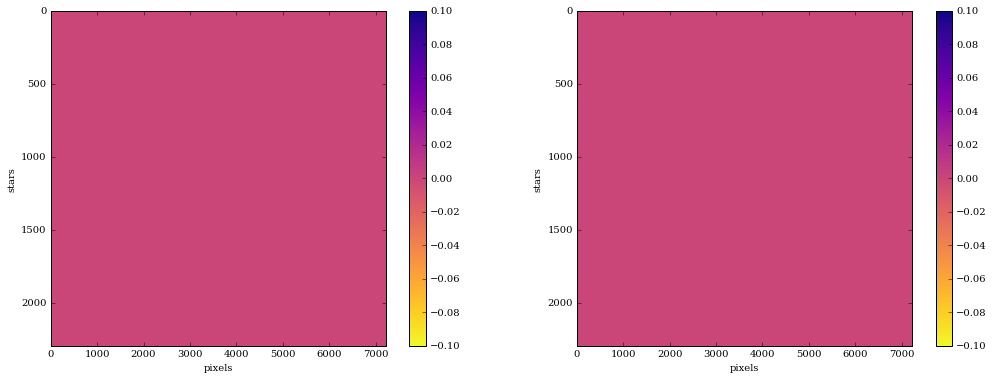

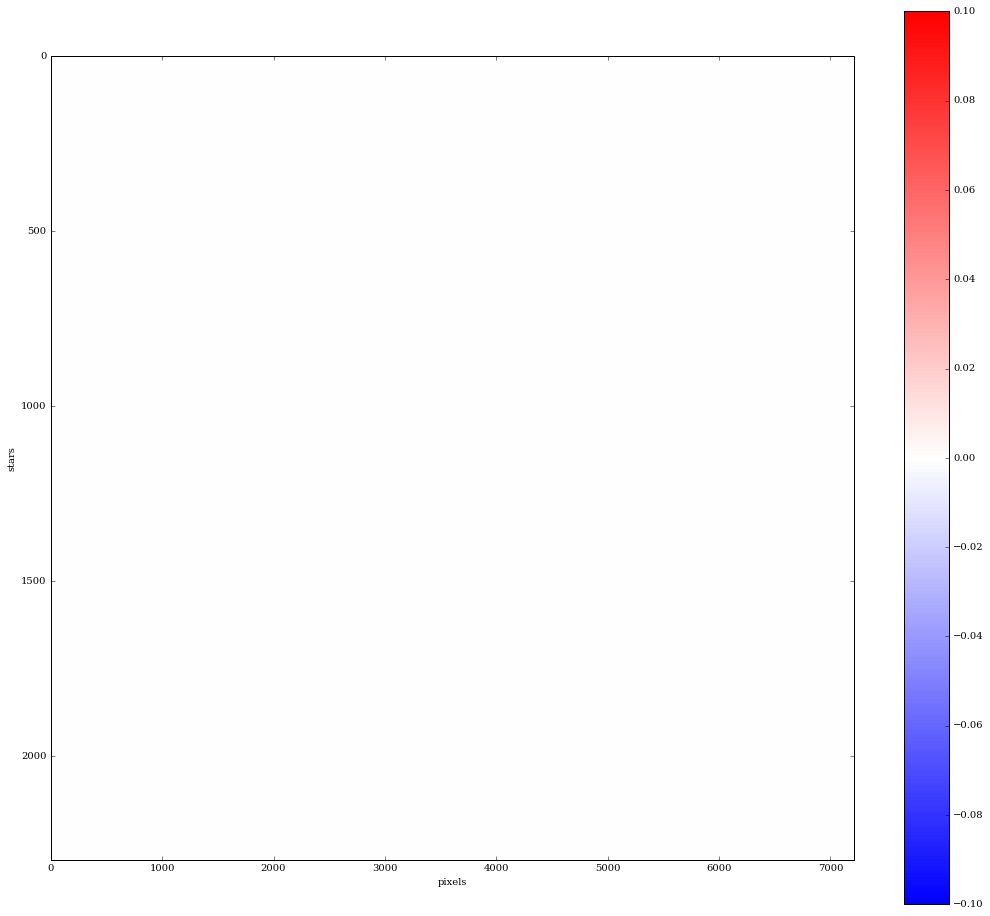

In [113]:
bit = 7
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

3372


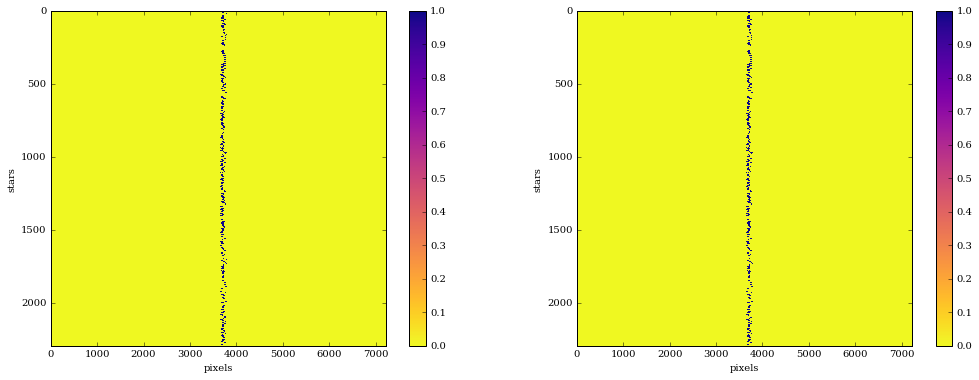

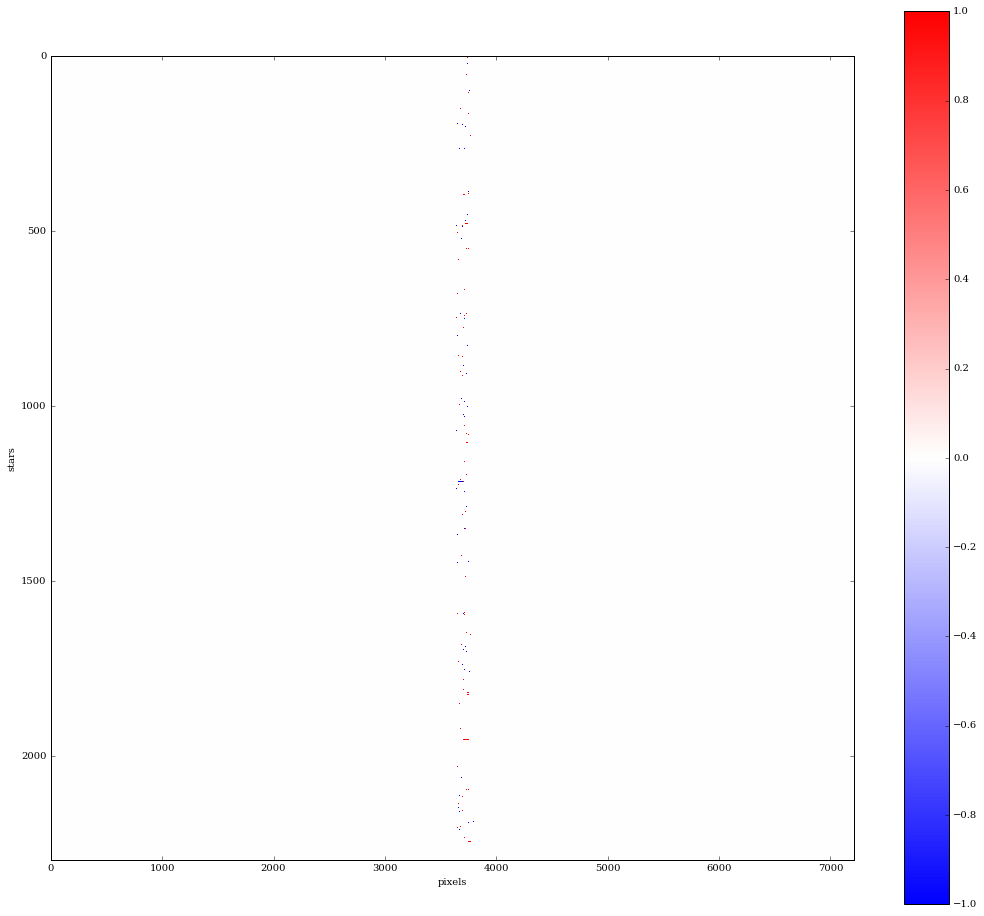

In [114]:
bit = 8
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

45701


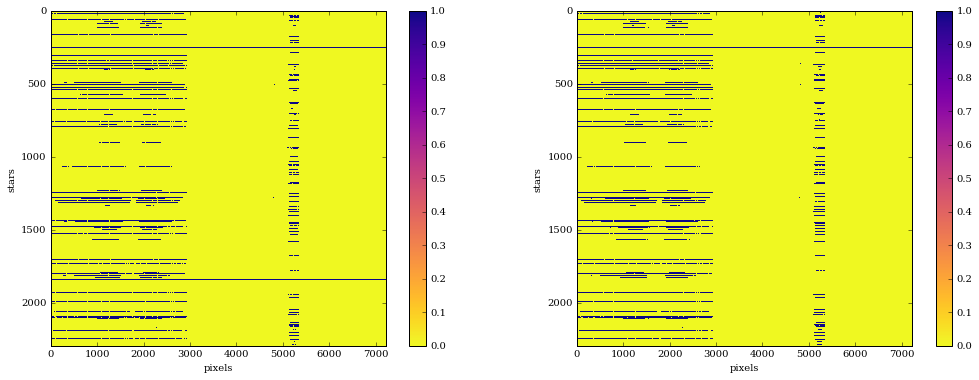

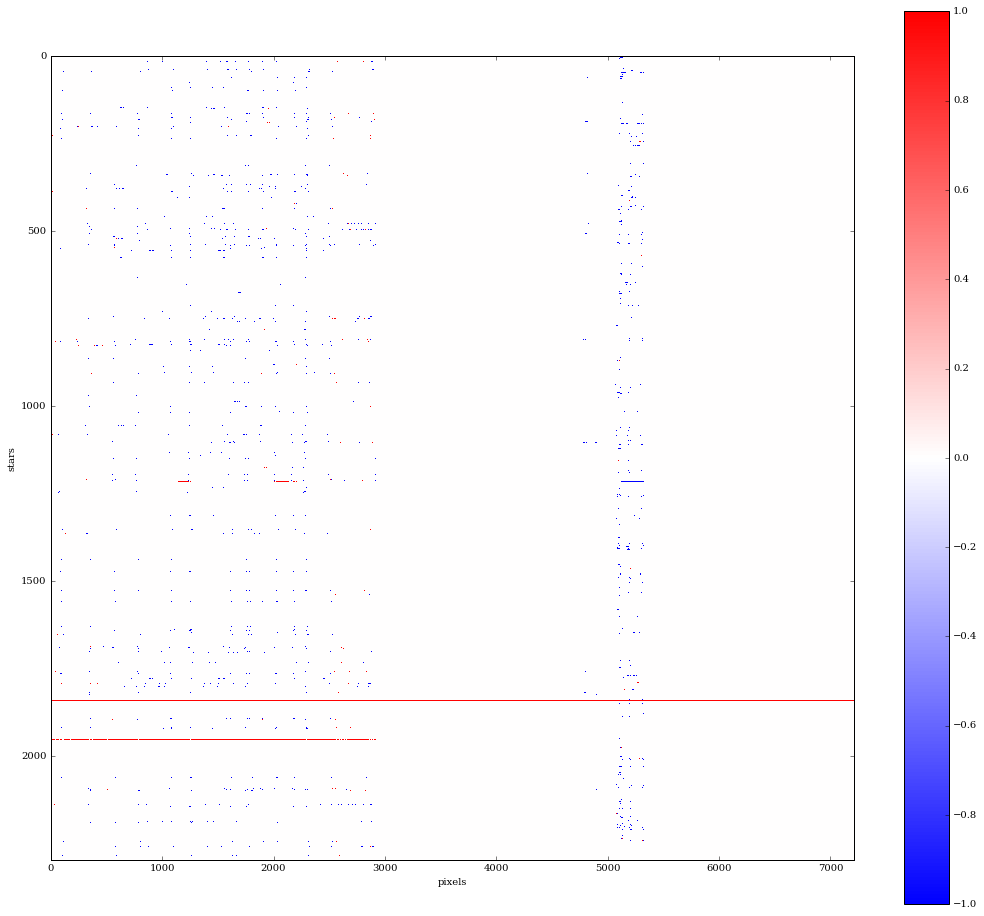

In [115]:
bit = 9
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

96410


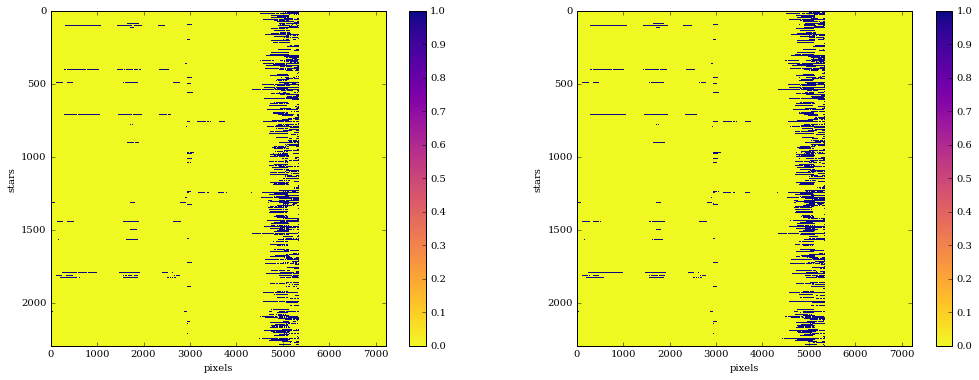

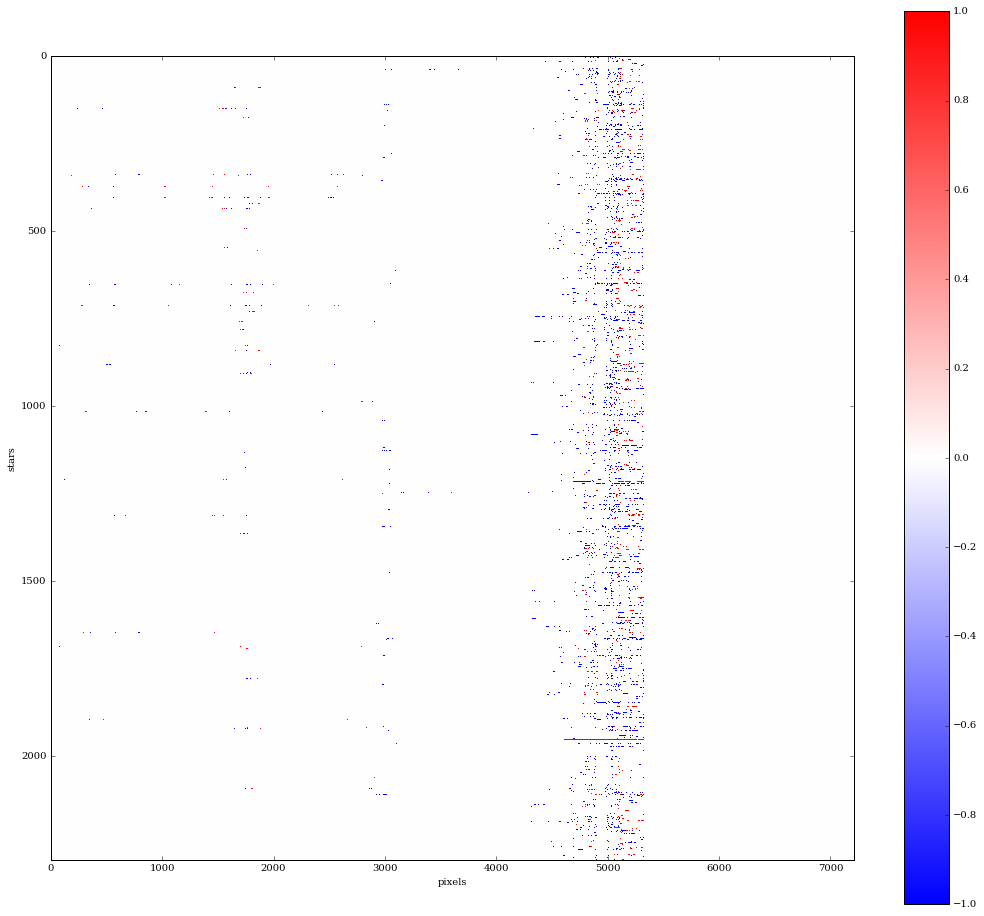

In [116]:
bit = 10
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

141131


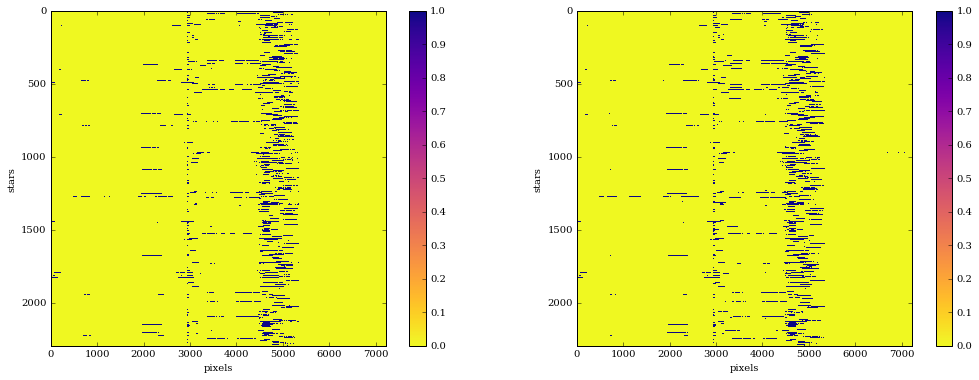

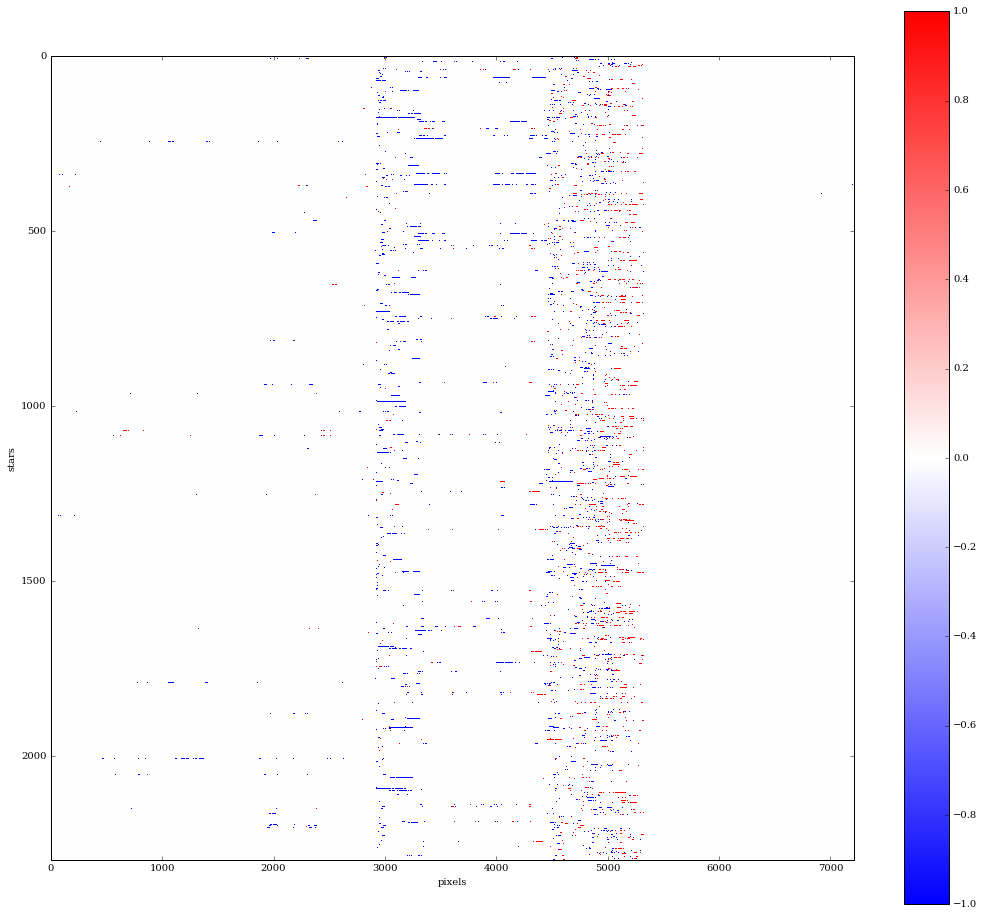

In [117]:
bit = 11
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

299876


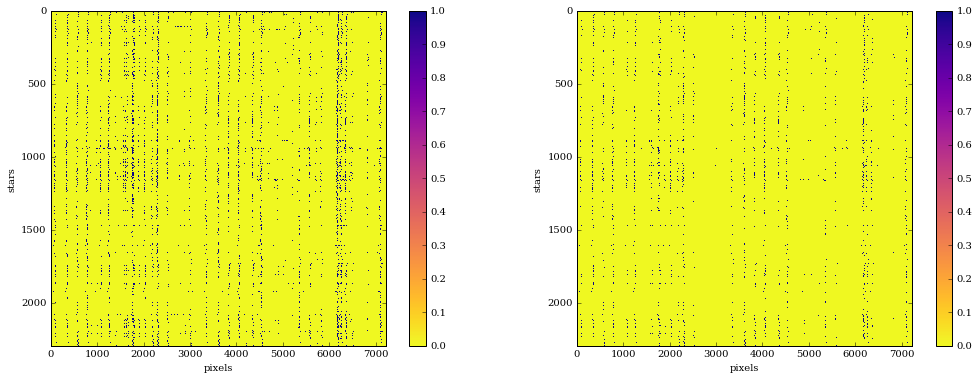

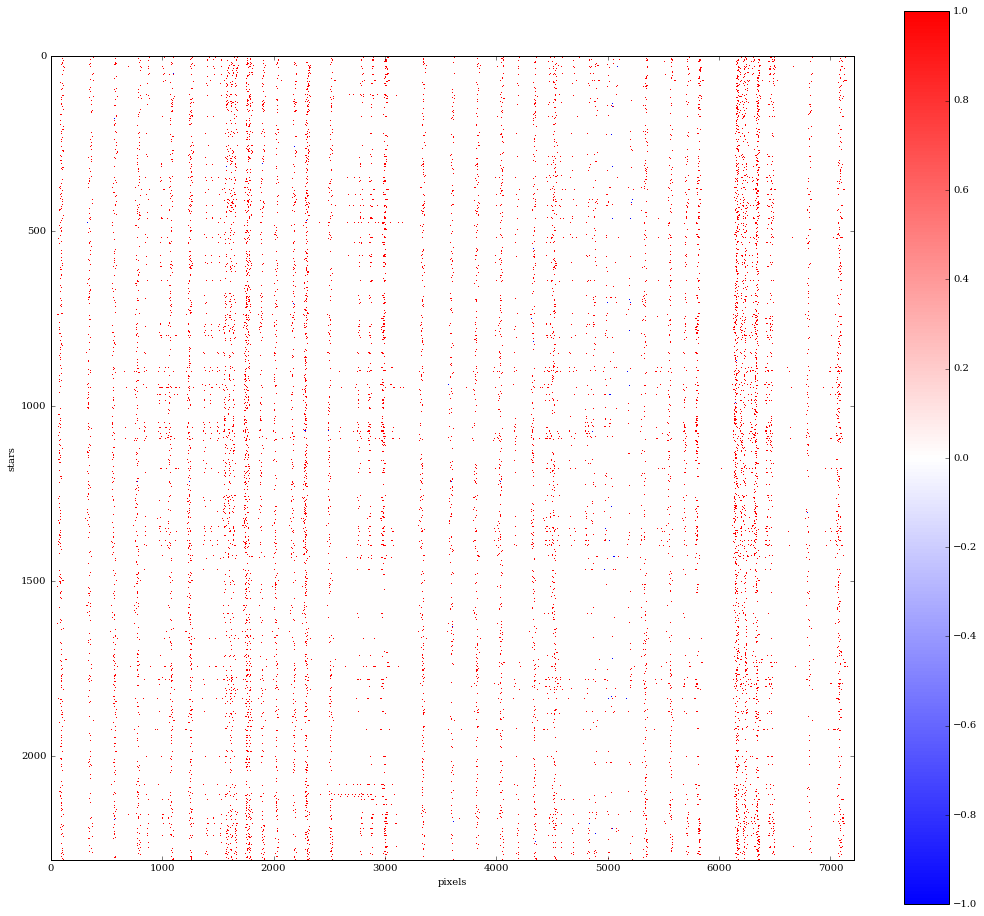

In [118]:
bit = 12
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

108410


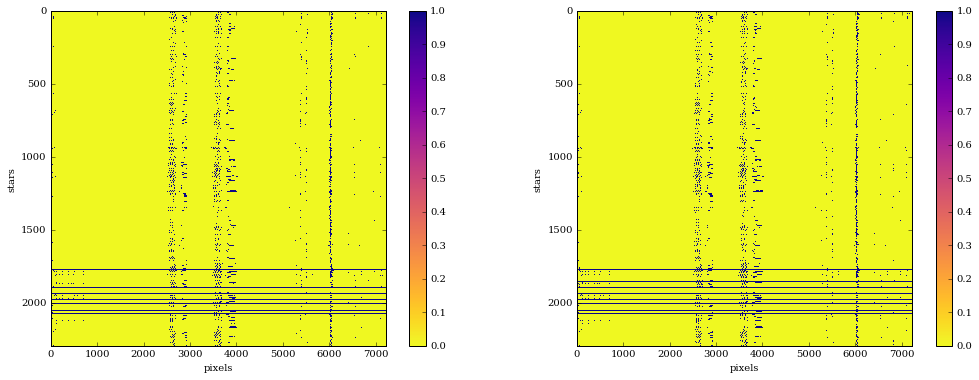

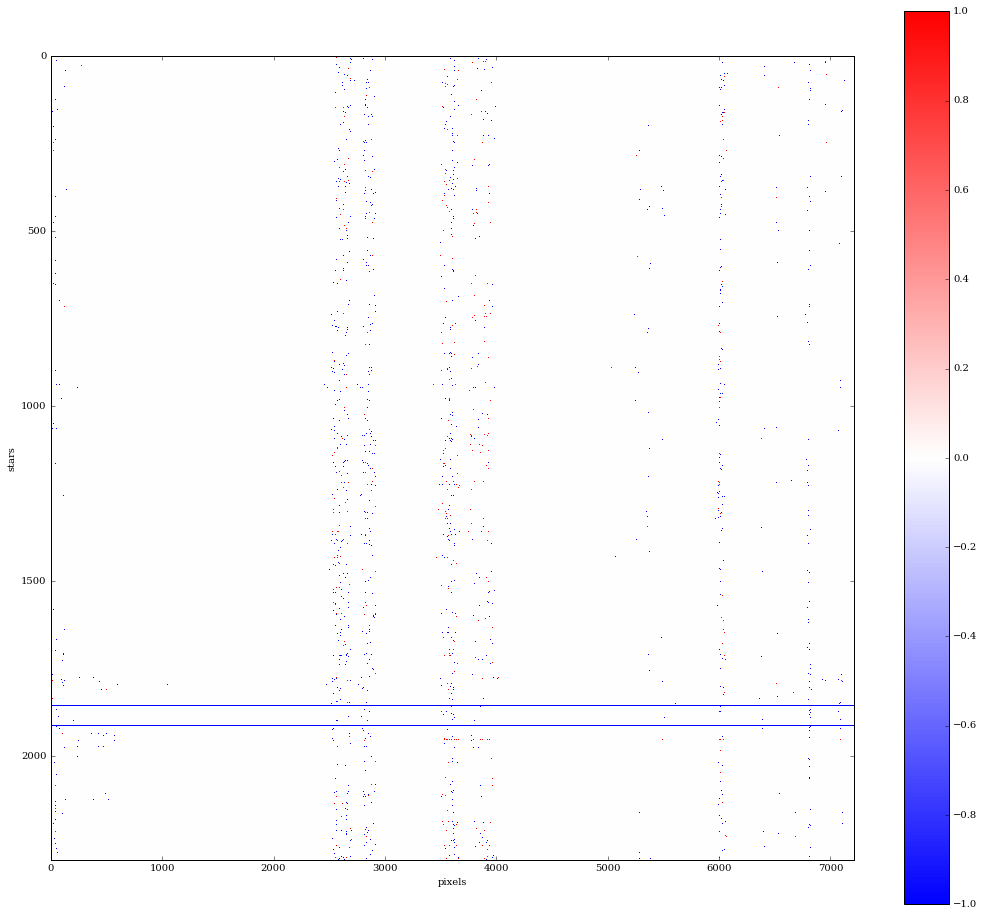

In [119]:
bit = 13
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])

0


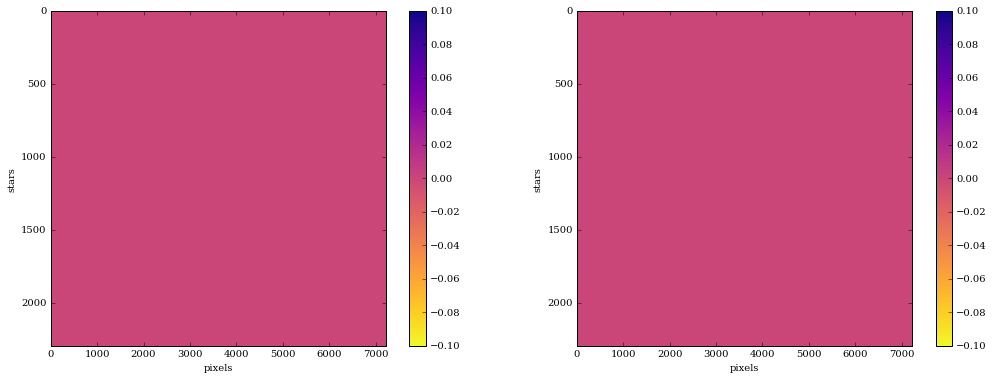

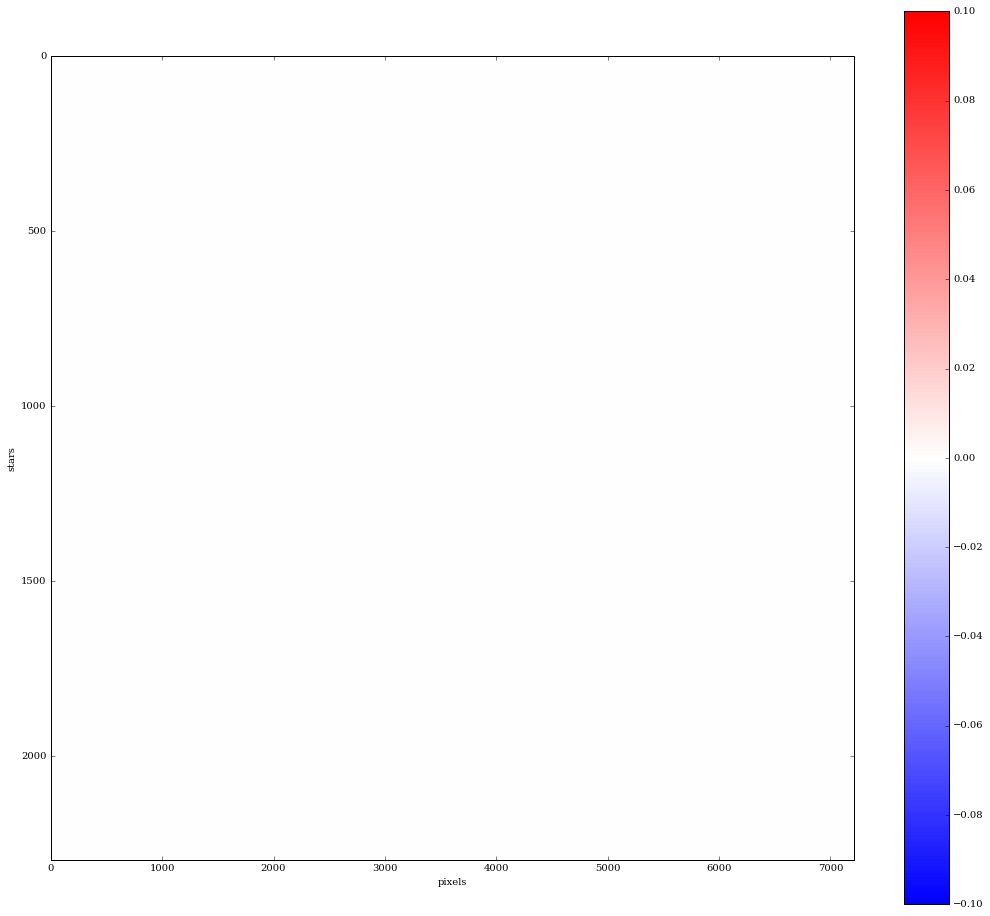

In [120]:
bit = 14
plt.figure(figsize=(18,6))
rc12bmmatch = rc12bm==bit
rc13bmmatch = rc13bm==bit
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12bmmatch,cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13bmmatch,cmap='plasma_r')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.figure(figsize=(18,16))
rc13.imshow(rc12bmmatch.astype(int)-rc13bmmatch.astype(int),cmap='bwr')
plt.savefig('dr_comparison_bit{0}.png'.format(bit))
print len(np.where(rc12bmmatch.astype(int)-rc13bmmatch.astype(int) != 0)[0])